# Goal
Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

**Import Libraries and load dataset**

In [576]:
#Import all the necessary modules
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

from yellowbrick.classifier import ClassificationReport, ROCAUC
from sklearn import metrics

In [577]:
colnames = ['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome','Target']
bank_df = pd.read_csv('bank-full.csv')

In [578]:
bank_df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


# Deliverable – 1 - Exploratory data quality report

**Univariate analysis**

In [579]:
#Shape
print(bank_df.shape)
# Data Types
print(bank_df.info())
#Check for nulls
print(bank_df.isnull().sum())

(45211, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
age          0
job          0
marital      0
education    0
default      0
balance

In [580]:
bank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [581]:
for feature in bank_df.columns: # Loop through all columns in the dataframe
    if bank_df[feature].dtype == 'object': # Only apply for columns with categorical strings
        bank_df[feature] = pd.Categorical(bank_df[feature])# Replace strings with an integer
bank_df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [582]:
for i in list(bank_df.columns[bank_df.dtypes=='category']):   # checking value counts of all object type columns
    print(bank_df[i].value_counts())
    print()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

no     44396
yes      815
Name: default, dtype: int64

yes    25130
no     20081
Name: housing, dtype: int64

no     37967
yes     7244
Name: loan, dtype: int64

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype:

In [583]:
#bank_df.loc[(df.job == 'unknown' & df.job),'job']='Hip-Hop'
bank_df.groupby(['education','job'])['job'].count()

education  job          
primary    admin.            209
           blue-collar      3758
           entrepreneur      183
           housemaid         627
           management        294
           retired           795
           self-employed     130
           services          345
           student            44
           technician        158
           unemployed        257
           unknown            51
secondary  admin.           4219
           blue-collar      5371
           entrepreneur      542
           housemaid         395
           management       1121
           retired           984
           self-employed     577
           services         3457
           student           508
           technician       5229
           unemployed        728
           unknown            71
tertiary   admin.            572
           blue-collar       149
           entrepreneur      686
           housemaid         173
           management       7801
           retired

In [584]:
#To fill unknowns in Education I grouped Education by Job and found below, 
#1. Admin, blue-color,retired,student seems to have more Secondary Education
#2. entrepreneur,management,self-employed,services,technician seems to have more tertiary
#3. housemaid,unemployed,unknown seems to have more Primary Education
#Used Maximum occurences 

bank_df['education'] = np.where((bank_df['education'] =='unknown') & (bank_df['job'].isin(['admin.','blue-collar','retired','student'])) ,'secondary', bank_df['education'])
bank_df['education'] = np.where((bank_df['education'] =='unknown') & (bank_df['job'].isin(['entrepreneur','management','self-employed','services','technician'])) ,'tertiary', bank_df['education'])
bank_df['education'] = np.where((bank_df['education'] =='unknown') & (bank_df['job'].isin(['housemaid','unemployed','unknown'])) ,'primary', bank_df['education'])

In [585]:
#There are are 288 unknowns in Job
#The same maximum/mode occurances can't be applied for unknown in Job, so it's safe to make them unemployed
# since those nos are less, i don't see a huge deviation in categorizing them under unemployed 

bank_df['job'] = np.where(bank_df['job'] =='unknown' ,'unemployed', bank_df['job'])

In [586]:
#There are 259 negative nos in balance, Balance can't be negative so defaulting this to zero
bank_df['balance'] = np.where(bank_df['balance'] < 0 ,0, bank_df['balance'])

In [587]:
#Fix the poutcome column for unknown and other, unknow with 'no' are categorized as failure , see below 
bank_df['poutcome'] = np.where((bank_df['poutcome'] == 'unknown') & (bank_df['Target'] == 0) ,'failure', bank_df['poutcome'])
bank_df['poutcome'] = np.where((bank_df['poutcome'] == 'unknown') & (bank_df['Target'] == 1) ,'success', bank_df['poutcome'])
bank_df['poutcome'] = np.where((bank_df['poutcome'] == 'other') & (bank_df['Target'] == 0) ,'failure', bank_df['poutcome'])
bank_df['poutcome'] = np.where((bank_df['poutcome'] == 'other') & (bank_df['Target'] == 1) ,'success', bank_df['poutcome'])

In [588]:
#print(bank_df.head(10))
bank_df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097730,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097730,1.000000,0.005788,0.021325,-0.014164,0.002730,0.016018
day,-0.009120,0.005788,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021325,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014164,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.002730,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016018,-0.051710,0.001203,-0.032855,0.454820,1.000000


AxesSubplot(0.125,0.125;0.775x0.755)


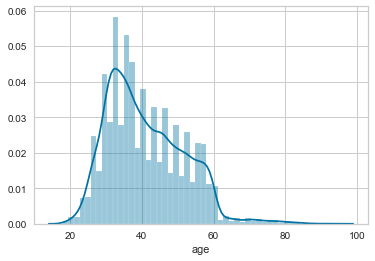

In [589]:
import seaborn as sns
#sns.set(style="ticks", color_codes=True)
#g = sns.pairplot(bank_df)
print(sns.distplot(bank_df['age']));

AxesSubplot(0.125,0.125;0.775x0.755)


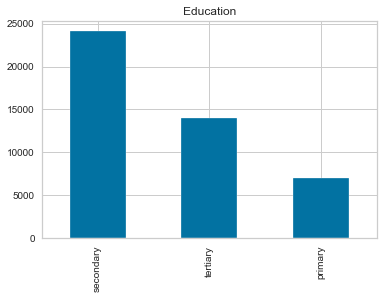

In [590]:
print(bank_df['education'].value_counts().plot.bar(title='Education'))

AxesSubplot(0.125,0.125;0.775x0.755)


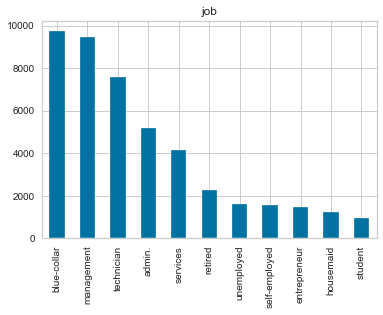

In [591]:
print(bank_df['job'].value_counts().plot.bar(title='job'))

AxesSubplot(0.125,0.125;0.775x0.755)


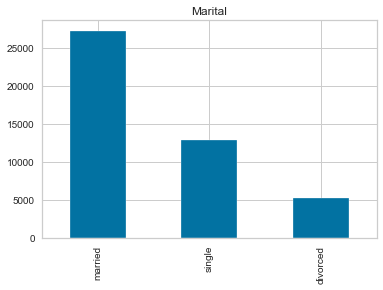

In [592]:
print(bank_df['marital'].value_counts().plot.bar(title='Marital'))

AxesSubplot(0.125,0.125;0.775x0.755)


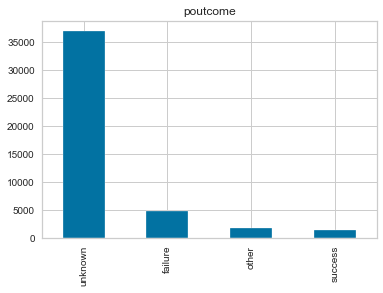

In [593]:
print(bank_df['poutcome'].value_counts().plot.bar(title='poutcome'))

<b>
 Conclusions after Univerate Analysis
    <ol>
        <li>
            Data doesn't not have null values
        </li>
    <li>        
There are 13,020 unknowns in Contacts, we don't need to consider filling this, knowing whether the contact method is Cellular or telphone doesn't the impact on Outcome, so we can remove them
    </li>
    <li>
        The duration can be used only for benchmark purpose, so this will skew the realistic model, so it's better to remove this column from model
    </li>
    <li>
        The day and month columns also doesn't seems to impact the outcome.
    </li>
        <li>
            There are more number of blue-coller and management workers compared to rest, more married compared to single, most of them completed secondary education
        </li>
        <li>
            Outliers - Balance were -ve for few data points, this is not possible set them to zero. Admin, blue-color,retired,student seems to have more Secondary Education, so missing eduction has been set to Secondary, like wise missing education has been fixed.
        </li>
</ol>
    </b>
    

**Bivariate analysis**

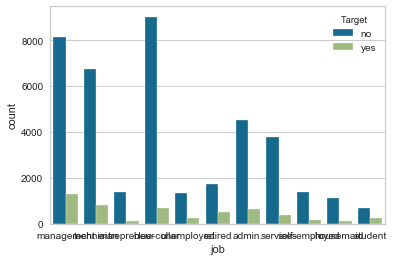

In [594]:
sns.countplot(bank_df['job'], hue=bank_df['Target']);

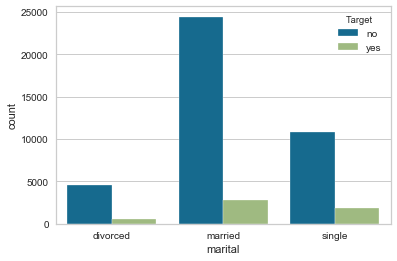

In [595]:
sns.countplot(bank_df['marital'], hue=bank_df['Target']);

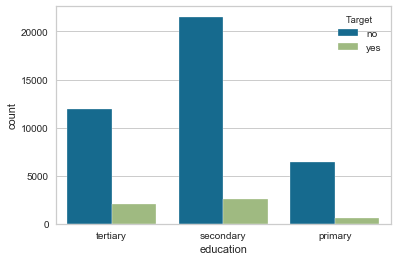

In [596]:
sns.countplot(bank_df['education'], hue=bank_df['Target']);

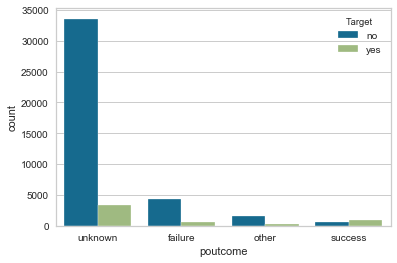

In [597]:
sns.countplot(bank_df['poutcome'], hue=bank_df['Target']);

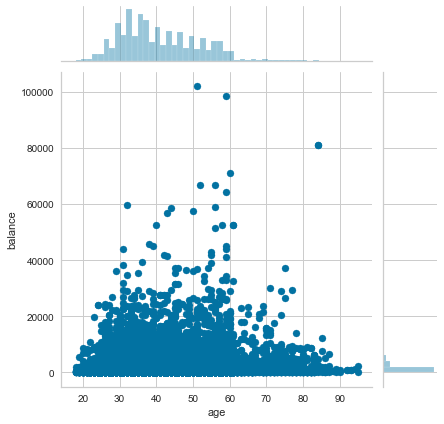

In [598]:
sns.jointplot(bank_df['age'], bank_df['balance']);

In [599]:
#changed Target variable to int for performing correlation
bank_df['Target'] = np.where(bank_df['Target'] == 'yes' ,1, bank_df['Target'])
bank_df['Target'] = np.where(bank_df['Target'] == 'no' ,0, bank_df['Target'])
bank_df['Target'] = bank_df['Target'].astype('int')

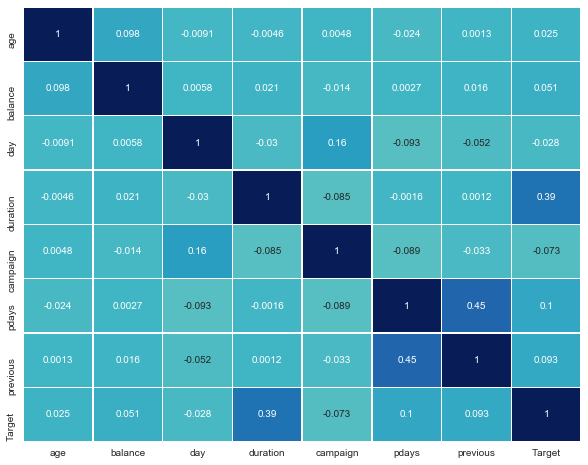

In [600]:
plt.figure(figsize=(10,8))

sns.heatmap(bank_df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

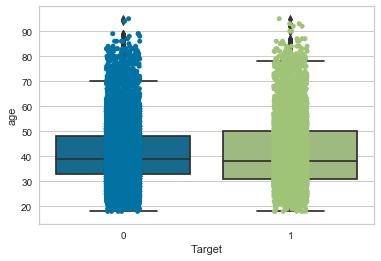

In [601]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='Target',y='age',data=bank_df)
ax = sns.stripplot(x="Target", y="age",data=bank_df)

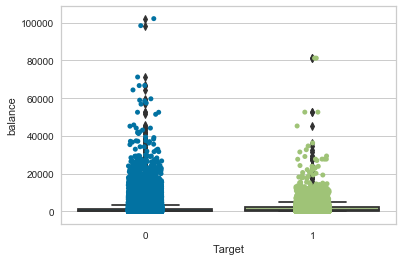

In [602]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='Target',y='balance',data=bank_df)
ax = sns.stripplot(x="Target", y="balance",data=bank_df)

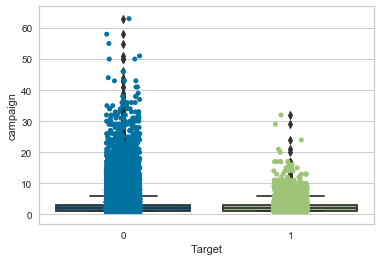

In [603]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='Target',y='campaign',data=bank_df)
ax = sns.stripplot(x="Target", y="campaign",data=bank_df)

<b>
 Conclusions after BiVariate Analysis
    <ol>
        <li>
            Management and Blue collor workers are more likely to subscribe to term deposit
        </li>
    <li>        
Married men\women are more likely to enroll in term deposit
    </li>
    <li>
        Members with secondary education are more likely to subscribe to term depsit
    </li>
    <li>
        Lower the age more the balance on loan, so they are less likely to enroll for term deposit.
    </li>
</ol>
    </b>
    

# Deliverable – 2 Prepare the data for analytics

**Getting Model ready and getting attributes ready**

In [604]:
#day and month columns also doesn't seems to impact the outcome
log_df = bank_df.drop(['contact', 'duration','day','month'], axis=1)
#Target Variable has be changed from Yes and No to 1 and 0 and as integer for better analysis in previous steps

In [605]:
#Based on iteration 1 Logistic expression model, we found housing,loan and balance doesn't seem to have any relivance to model so removing them
#log_df = log_df.drop(['campaign', 'pdays','poutcome'], axis=1)

In [606]:
#Based on Iteration 2 Logistic expression model, we found age, balance, campaign,pdays,previous doesn't seem to have any relivance to model so removing them
#bank_df = bank_df.drop(['age', 'balance','campaign','pdays','previous'], axis=1)

**Create the training set and test set in ratio of 70:30**

In [607]:
## Define X and Y variables
X=log_df.drop('Target',axis=1)
Y=log_df['Target']

#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=10)
x_train.shape, x_test.shape

((31647, 25), (13564, 25))

In [608]:
x_test.head()

,age,balance,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,marital_married,marital_single,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes,poutcome_other,poutcome_success,poutcome_unknown
4393,55,0,4,-1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4438,31,1820,1,-1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
11108,28,2253,2,-1,0,0,0,0,1,0,...,0,1,0,1,0,1,0,0,0,1
35421,28,7449,1,-1,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
2667,43,59,2,-1,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1


# Deliverable – 3 Create the ensemble model 

**Logistic Regression**

In [609]:
#Build the logistic regression model
import statsmodels.api as sm

logit = sm.Logit(y_train, sm.add_constant(x_train))
lg = logit.fit()

#Summary of logistic regression
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.316498
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31621
Method:                           MLE   Df Model:                           25
Date:                Sat, 01 Aug 2020   Pseudo R-squ.:                  0.1274
Time:                        03:59:09   Log-Likelihood:                -10016.
converged:                       True   LL-Null:                       -11479.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.3694      0.177     -7.725      0.000      -1.717      -1.022
ag

In [610]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [611]:
y_predict = logreg.predict(x_test)

In [612]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

In [613]:
model_df = pd.DataFrame(columns=['Training accuracy', 'Testing accuracy','Roc Auc Score'],index=['Logistic', 'DecisionTree', 'Bagging','AdaBoosting','RandomForest'])

print("Empty Dataframe ", model_df, sep='\n')

Empty Dataframe 
             Training accuracy Testing accuracy Roc Auc Score
Logistic                   NaN              NaN           NaN
DecisionTree               NaN              NaN           NaN
Bagging                    NaN              NaN           NaN
AdaBoosting                NaN              NaN           NaN
RandomForest               NaN              NaN           NaN


Training accuracy 0.8825481088254811

Testing accuracy 0.8857269242111472

Confusion Matrix



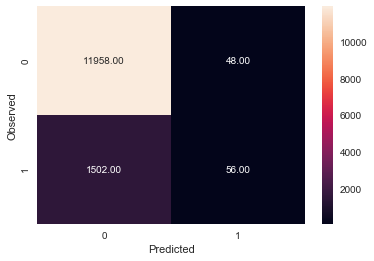

None

Recall: 0.03594351732991014

Precision: 0.5384615384615384

F1 Score: 0.06738868832731648

Roc Auc Score: 0.5159727581652049

              precision    recall  f1-score   support

           0     0.8884    0.9960    0.9391     12006
           1     0.5385    0.0359    0.0674      1558

    accuracy                         0.8857     13564
   macro avg     0.7134    0.5160    0.5033     13564
weighted avg     0.8482    0.8857    0.8390     13564



In [614]:
model_df.loc['Logistic'] = [logreg.score(x_train,y_train),logreg.score(x_test, y_test),roc_auc_score(y_test,y_predict)]

print("Training accuracy",logreg.score(x_train,y_train))  
print()
print("Testing accuracy",logreg.score(x_test, y_test))
print()
print('Confusion Matrix')
print()
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))
print()
print(classification_report(y_test,y_predict,digits=4))

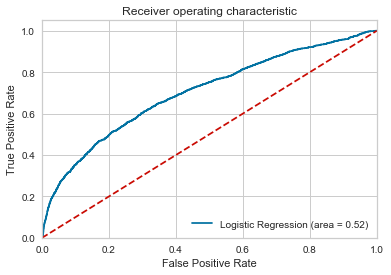

In [615]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**Logistic Model is giving close to 95 accuracy for both Training and Testing Data and ROC curve is also close to perfect fit**

**Descision Tree**

In [616]:
dt_df = bank_df.drop(['contact', 'duration','day','month'], axis=1)

In [617]:
## Define X and Y variables
X=dt_df.drop('Target',axis=1)
Y=dt_df['Target']

#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=10)
x_train.shape, x_test.shape

((31647, 25), (13564, 25))

In [618]:
model_entropy = DecisionTreeClassifier(criterion='entropy')

In [619]:
model_entropy.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [620]:
print("Train: %.2f" % model_entropy.score(x_train, y_train))  # performance on train data
print("Test: %.2f" % model_entropy.score(x_test, y_test))  # performance on test data

Train: 1.00
Test: 0.82


In [621]:
#Descion Tree seems to be overfit in Train model, let is we can prune the max depth retry the accuracy
clf_pruned = DecisionTreeClassifier(criterion = "entropy", max_depth=4)
clf_pruned.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [622]:
print("Train: %.2f" % clf_pruned.score(x_train, y_train))  # performance on train data
print("Test: %.2f" % clf_pruned.score(x_test, y_test))  # performance on test data

Train: 0.89
Test: 0.89


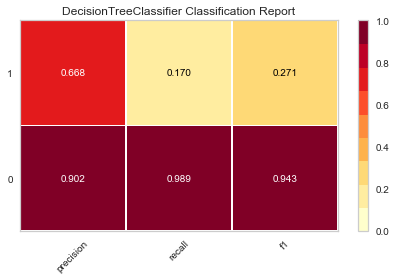

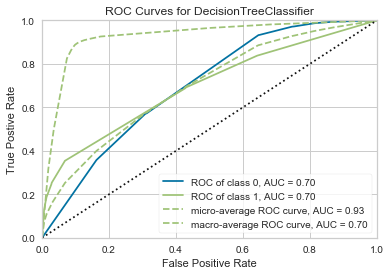

In [623]:
viz = ClassificationReport(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

roc = ROCAUC(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc.show()

In [624]:
model_df.loc['DecisionTree'] = [clf_pruned.score(x_train, y_train),clf_pruned.score(x_test, y_test),roc.score(x_test, y_test)]

In [625]:
model_df.head()

,Training accuracy,Testing accuracy,Roc Auc Score
Logistic,0.882548,0.885727,0.515973
DecisionTree,0.893007,0.894942,0.696748
Bagging,NaN,NaN,NaN
AdaBoosting,NaN,NaN,NaN
RandomForest,NaN,NaN,NaN


**Ensemble Models - Bagging**

In [626]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=clf_pruned, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1) 

bgcl = bgcl.fit(x_train, y_train)

0.8950899439693306


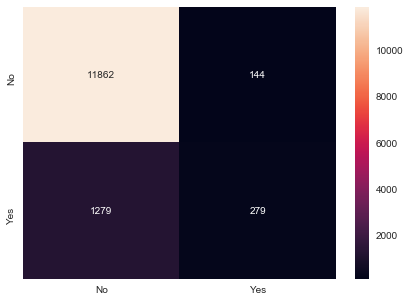

In [627]:
y_predict = bgcl.predict(x_test)

print(bgcl.score(x_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


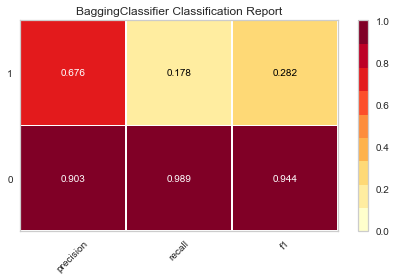

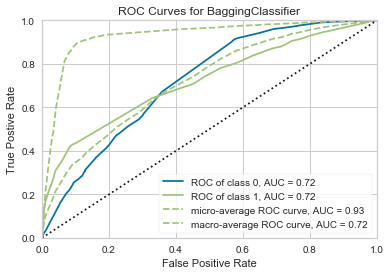

In [628]:
viz = ClassificationReport(BaggingClassifier(base_estimator=clf_pruned))
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

roc = ROCAUC(BaggingClassifier(base_estimator=clf_pruned))
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc.show()

In [629]:
model_df.loc['Bagging'] = [bgcl.score(x_train, y_train),bgcl.score(x_test , y_test),roc.score(x_test, y_test)]

**Ensemble Models - AdaBoosting**

In [630]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1) #depth of 1
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(x_train, y_train)

0.8948687702742554


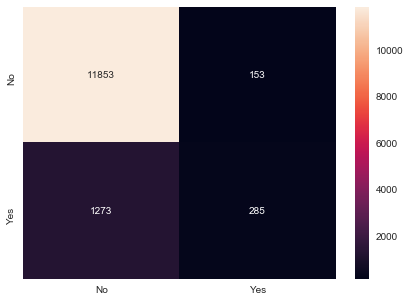

In [631]:
y_predict = abcl.predict(x_test)
print(abcl.score(x_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

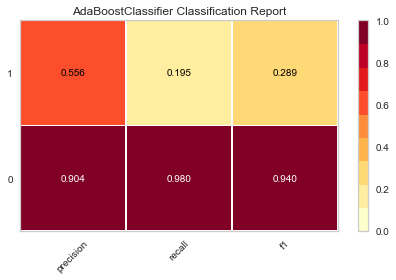

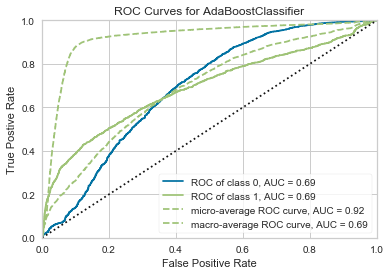

In [632]:
viz = ClassificationReport(AdaBoostClassifier(base_estimator=clf_pruned))
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

roc = ROCAUC(AdaBoostClassifier(base_estimator=clf_pruned))
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc.show()

In [633]:
model_df.loc['AdaBoosting'] = [abcl.score(x_train, y_train),abcl.score(x_test , y_test),roc.score(x_test, y_test)]

**Ensemble Models - Random Forest**

In [639]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(x_train, y_train)

In [640]:
pred_RF = rfcl.predict(x_test)
acc_RF = accuracy_score(y_test, pred_RF)

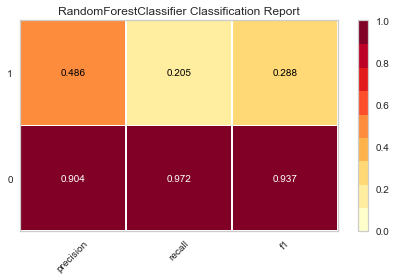

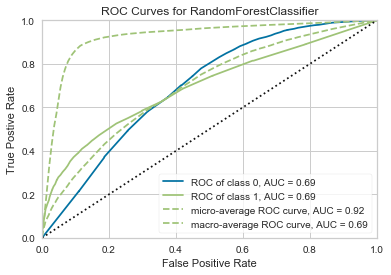

In [641]:
viz = ClassificationReport(RandomForestClassifier(n_estimators = 50))
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

roc = ROCAUC(RandomForestClassifier(n_estimators = 50))
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc.show()

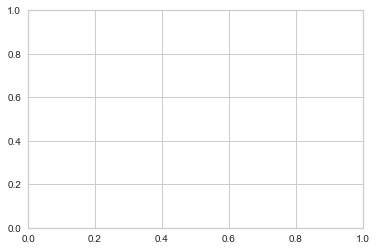

In [644]:
model_df.loc['RandomForest'] = [viz.score(x_train, y_train),viz.score(x_test , y_test),roc.score(x_test, y_test)]

**Conclusion**


In [645]:
model_df.head()

,Training accuracy,Testing accuracy,Roc Auc Score
Logistic,0.882548,0.885727,0.515973
DecisionTree,0.893007,0.894942,0.696748
Bagging,0.893671,0.89509,0.719693
AdaBoosting,0.892186,0.894869,0.689733
RandomForest,0.99684,0.883736,0.694222


**Model table shows Accuracies of Various Training models, most of them gives similar results. Random Forest seems to be overfitting, maybe pruning the forest might give better result. if we consider ROC Score Bagging seems to be best option. Since all the models have similar accuracy, i would consider the cost of executing the model. If logistic regression takes less time and less crunching power, i would select it.**